In [2]:
'''
2. Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a. 
Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion 
matrix. 
'''
None

In [15]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import cv2

In [4]:
# 1. Data Preprocessing
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to add channel dimension (CNN expects 4D input)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [6]:
# 2. Define CNN Model
model = Sequential()

# Convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second conv layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Fully Connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for MNIST

D:\Acadamics\Internship\iGurus\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# 3. Train the Model
history = model.fit(X_train, y_train_cat, epochs=5, validation_data=(X_test, y_test_cat))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9049 - loss: 0.3155 - val_accuracy: 0.9834 - val_loss: 0.0534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9852 - loss: 0.0467 - val_accuracy: 0.9895 - val_loss: 0.0331
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9917 - loss: 0.0271 - val_accuracy: 0.9907 - val_loss: 0.0278
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9922 - val_loss: 0.0262
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.9917 - val_loss: 0.0279


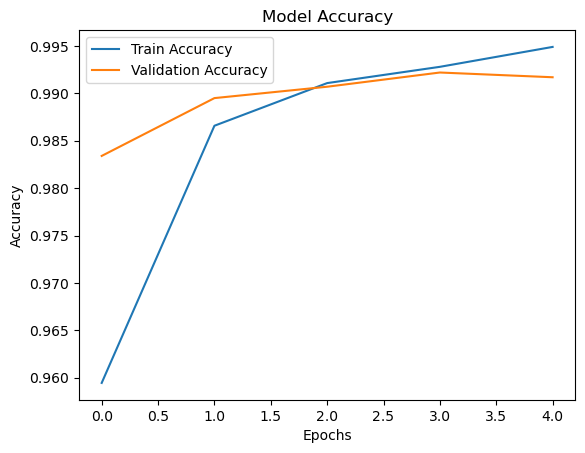

In [9]:
# 4. Evaluate Results
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [10]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9898 - loss: 0.0345

Test Accuracy: 99.17%


In [11]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


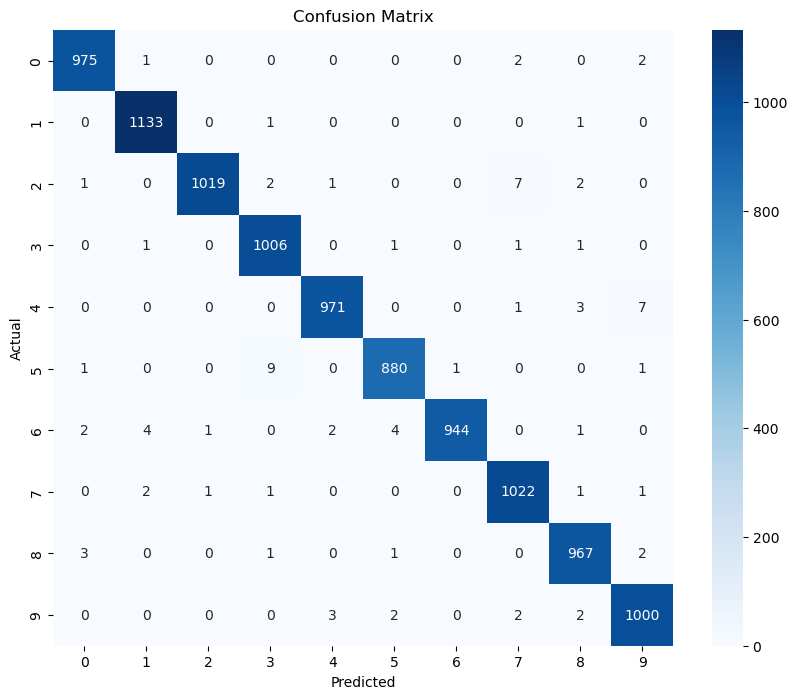

In [12]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Digit: 4


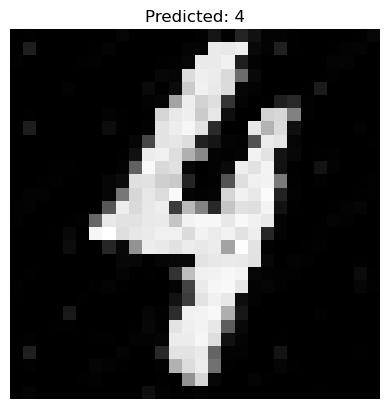

In [17]:
img = cv2.imread('four.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Resize image to 28x28 (MNIST size)
img = cv2.resize(img, (28,28))

# 3. Invert colors if background is black
img = 255 - img

# 4. Normalize pixel values
img = img / 255.0

# 5. Reshape image to (1, 28, 28, 1) as model expects 4D input
img = img.reshape(1,28,28,1)

# 6. Predict using the trained model
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

print(f"Predicted Digit: {predicted_class}")

# 7. Show the input image
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


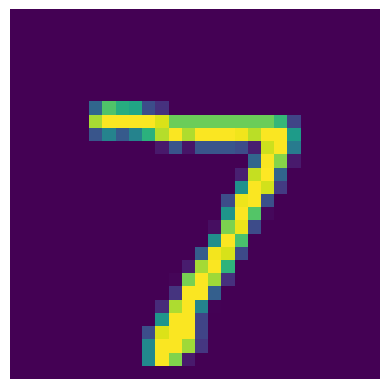

Predicted label: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


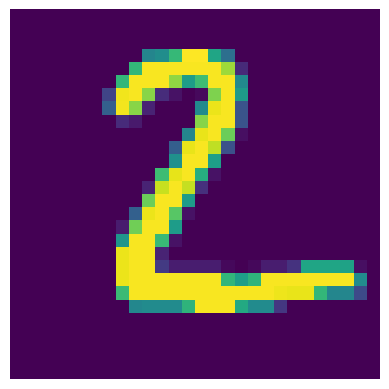

Predicted label: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


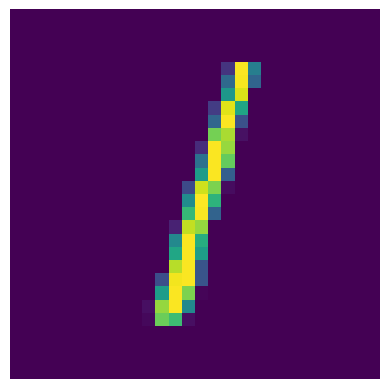

Predicted label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


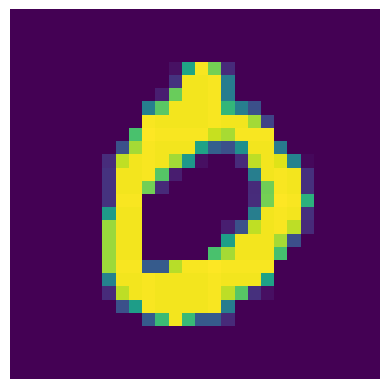

Predicted label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


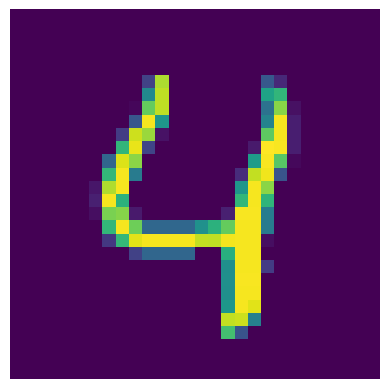

Predicted label: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


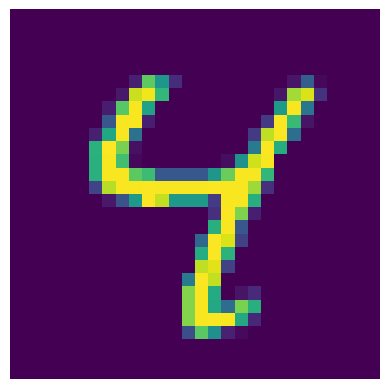

Predicted label: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


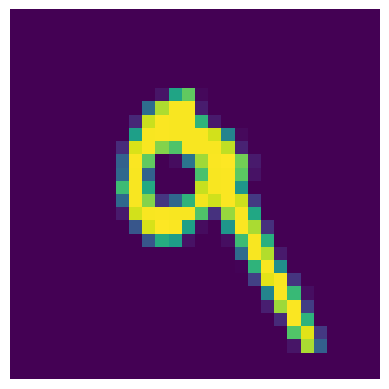

Predicted label: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


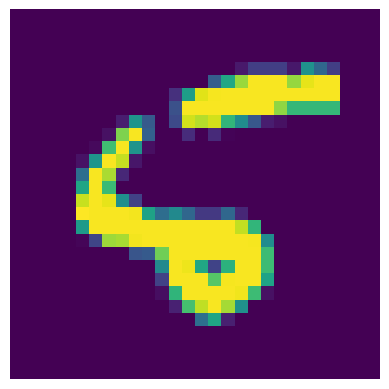

Predicted label: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


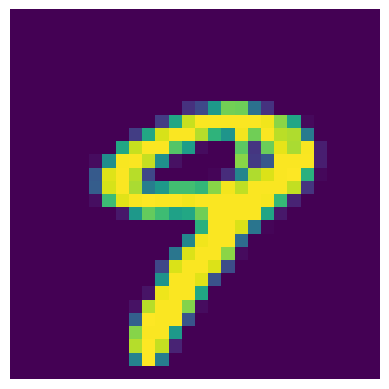

Predicted label: 9


In [19]:
indices = [0, 1, 2, 3, 4,6,7,8,9]

for index in indices:
    test_image = X_test[index]

    test_image_reshaped = np.reshape(test_image, (1, 28, 28, 1))

    prediction = model.predict(test_image_reshaped)

    predicted_label = np.argmax(prediction)

    plt.imshow(test_image)
    plt.axis('off')
    plt.show()

    print("Predicted label:", predicted_label)